## numpy.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=False)

### Parameters

|param|type|概要|
|---|---|---|
|dtype|データ型|分散を計算する際に用いるデータ型を指定します。デフォルトでは入力された配列が整数型の場合float32が指定され、それ以外の場合、aで指定された配列のデータ型に従います。|
|ddof|int|分散を計算する際、平均との偏差の2乗の和をN-ddofで割ります。初期値ではddof=0なのでデータ数であるNで割ることになります。|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
b = np.random.randint(20, size=(3,4))
b

array([[ 6, 19,  1, 10],
       [15,  1, 18,  4],
       [16, 19,  4,  2]])

In [3]:
np.var(b) # 特にaxisを指定しないと全体の分散を求める。

49.90972222222222

In [4]:
np.var(b, axis=0) # 行ごとの分散を求める

array([20.22222222, 72.        , 54.88888889, 11.55555556])

In [5]:
np.var(b, axis=1) # 列ごとの分散を求める

array([43.5   , 51.25  , 54.1875])

In [6]:
c = np.random.randn(100).reshape(5,20)

In [7]:
np.var(c, dtype='float32') 

1.0771235

In [8]:
np.var(c, dtype='float64') 

1.0771234582158211

## 不偏分散は不偏なのか？

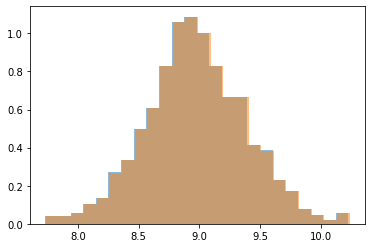

In [9]:
### Prameter
iteration = 1000
std = 3
mean = 0

biased = []
unbiased = []

for i in range(1000):
    tmp = np.random.normal(loc = mean, scale = std, size = iteration)
    biased.append(np.var(tmp))
    unbiased.append(np.var(tmp, ddof=1))

plt.hist(biased, bins = 'auto', density=True, alpha = 0.5)
plt.hist(unbiased, bins = 'auto', density=True, alpha = 0.5);


In [10]:
print('unbiased : {} biased: {}'.format(np.mean(unbiased),np.mean(biased)))

unbiased : 8.979981611037172 biased: 8.971001629426135


t testで確認

In [11]:
stats.ttest_1samp(unbiased, 9)

Ttest_1sampResult(statistic=-1.5447778860348866, pvalue=0.12271669872809923)

In [12]:
stats.ttest_1samp(biased, 9)

Ttest_1sampResult(statistic=-2.2399845741478206, pvalue=0.02531118408616785)